<a href="https://colab.research.google.com/github/dilanHewawitharana/TensorFlow-2.0-Self-Learning/blob/main/05_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [3]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 11s 0us/step


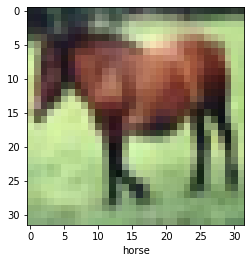

In [4]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()  # let's have a look at our model so far

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5949 - accuracy: 0.4198 - val_loss: 1.2573 - val_accuracy: 0.5545
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1715 - accuracy: 0.5840 - val_loss: 1.1216 - val_accuracy: 0.6040
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0354 - accuracy: 0.6343 - val_loss: 1.0165 - val_accuracy: 0.6459
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9096 - accuracy: 0.6821 - val_loss: 0.9700 - val_accuracy: 0.6615
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8445 - accuracy: 0.7057 - val_loss: 0.8894 - val_accuracy: 0.6942
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7956 - accuracy: 0.7209 - val_loss: 0.8616 - val_accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7298 - accuracy: 0.7441 - val_loss: 0.8768 -

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8847 - accuracy: 0.7104
0.7103999853134155
